In [1]:
//Dependency stuff
@file:Repository("https://repo1.maven.org/maven2")
@file:DependsOn("com.github.holgerbrandl:krangl:0.18")
@file:DependsOn("com.github.holgerbrandl:kravis:0.8.5")
@file:DependsOn("thu.mohr.jonas:PhysicsExperimentLib:3.0.0")
@file:DependsOn("org.apache.commons:commons-lang3:3.12.0")
//Import custom library
import thu.mohr.jonas.physics.*

In [2]:
//Read raw Phyphox data
val rawData = DataFrame.readCSV("RawData.csv")

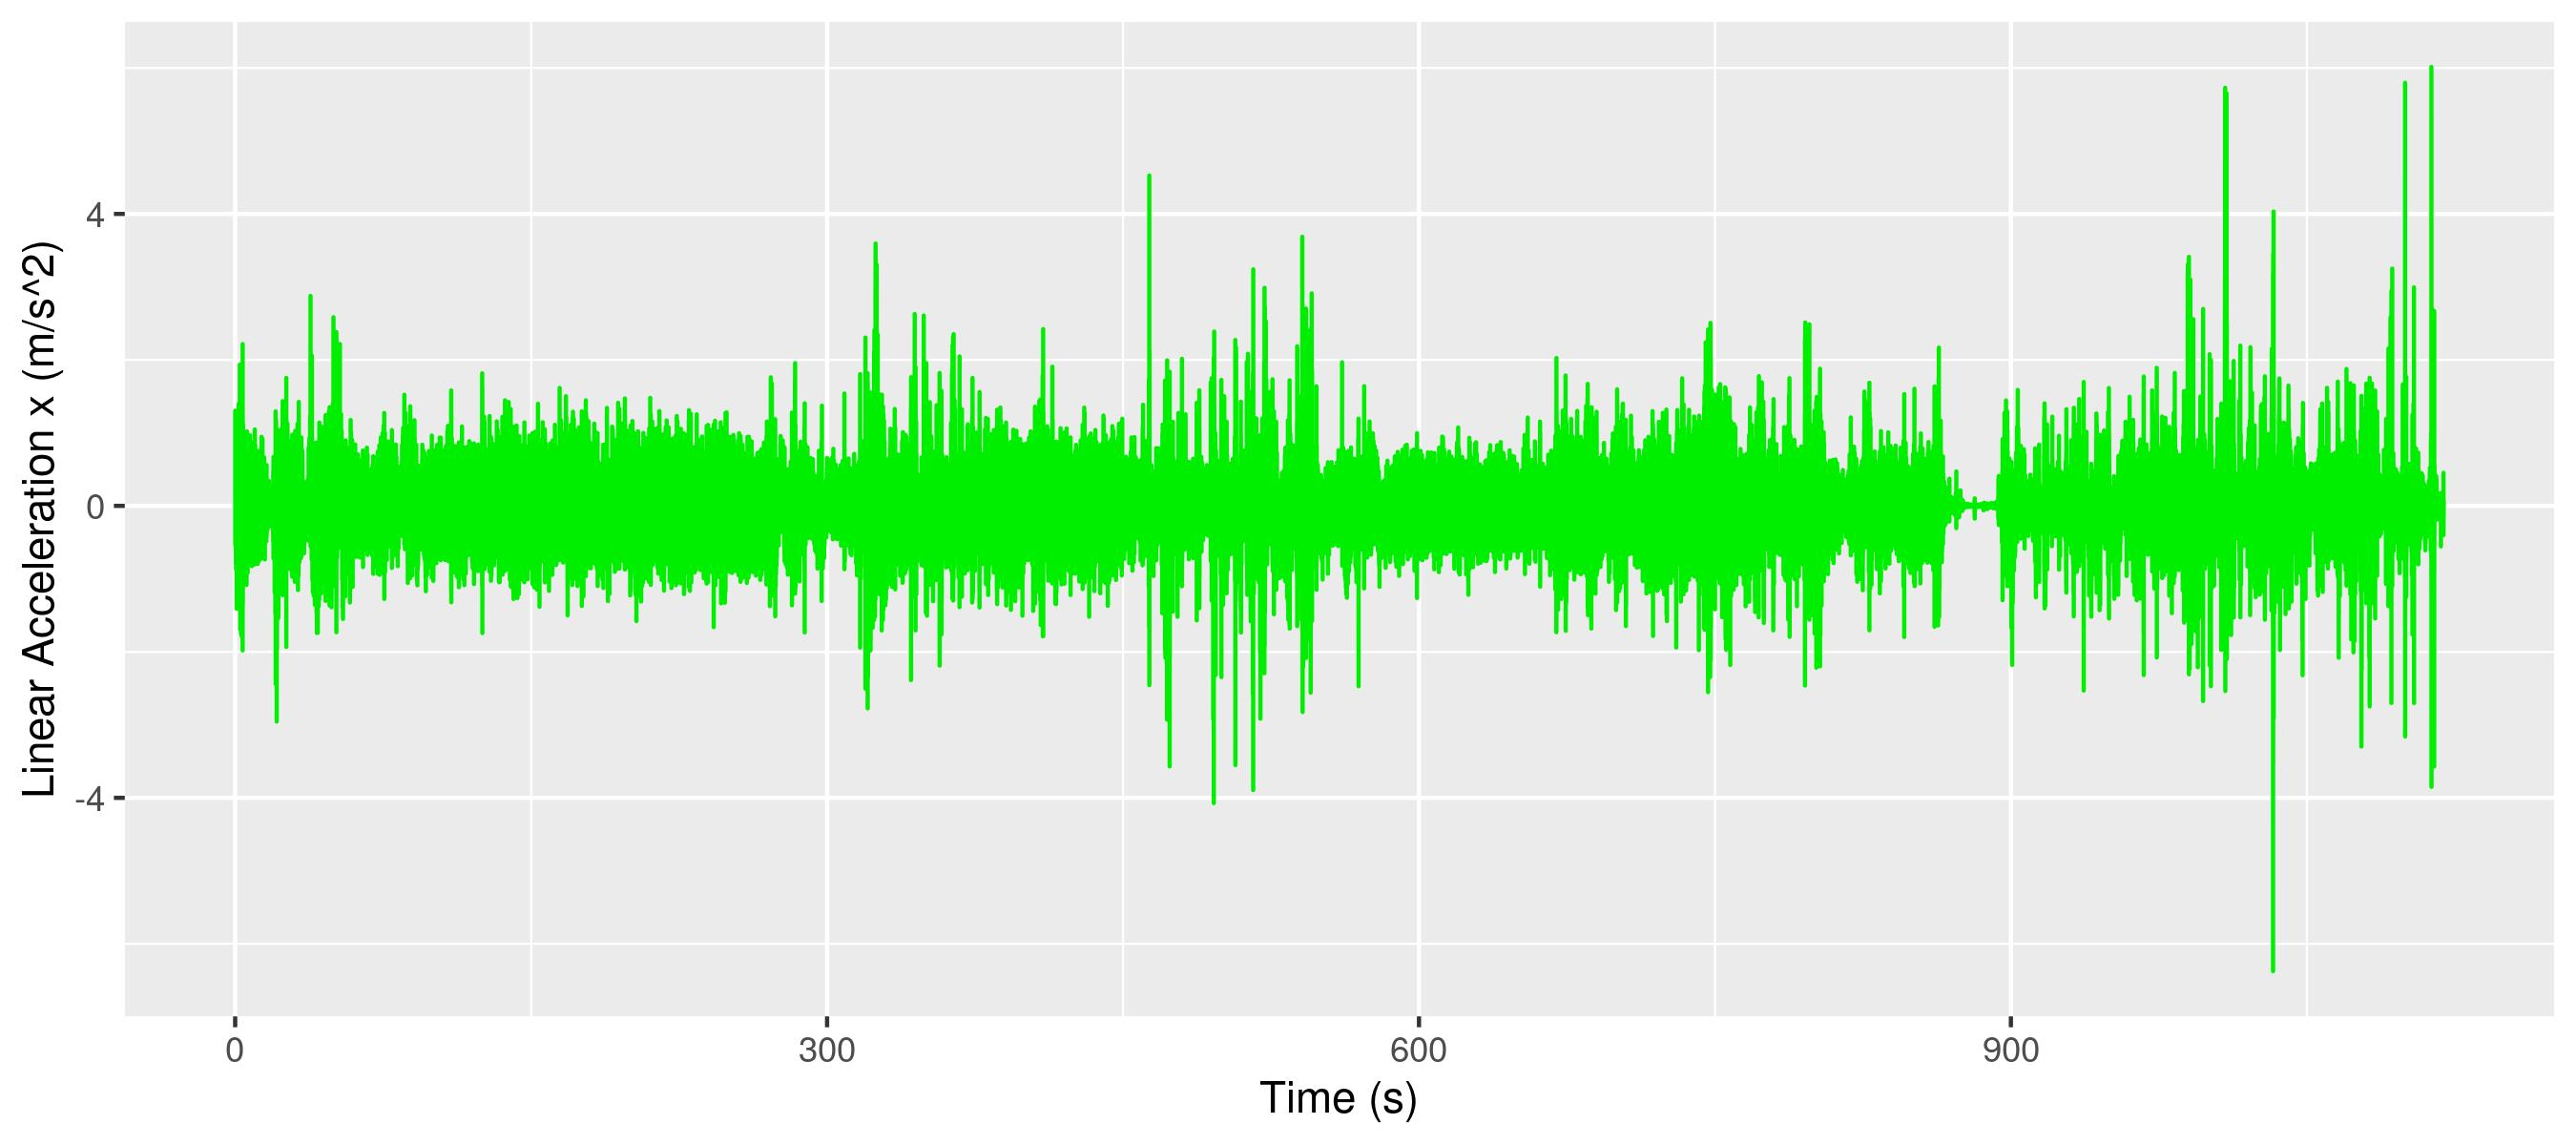

In [3]:
//Plot raw x-axis data
rawData.plot(Aes(x = "Time (s)")).geomLine(color = RColor.green2, mapping = Aes(y="Linear Acceleration x (m/s^2)"))

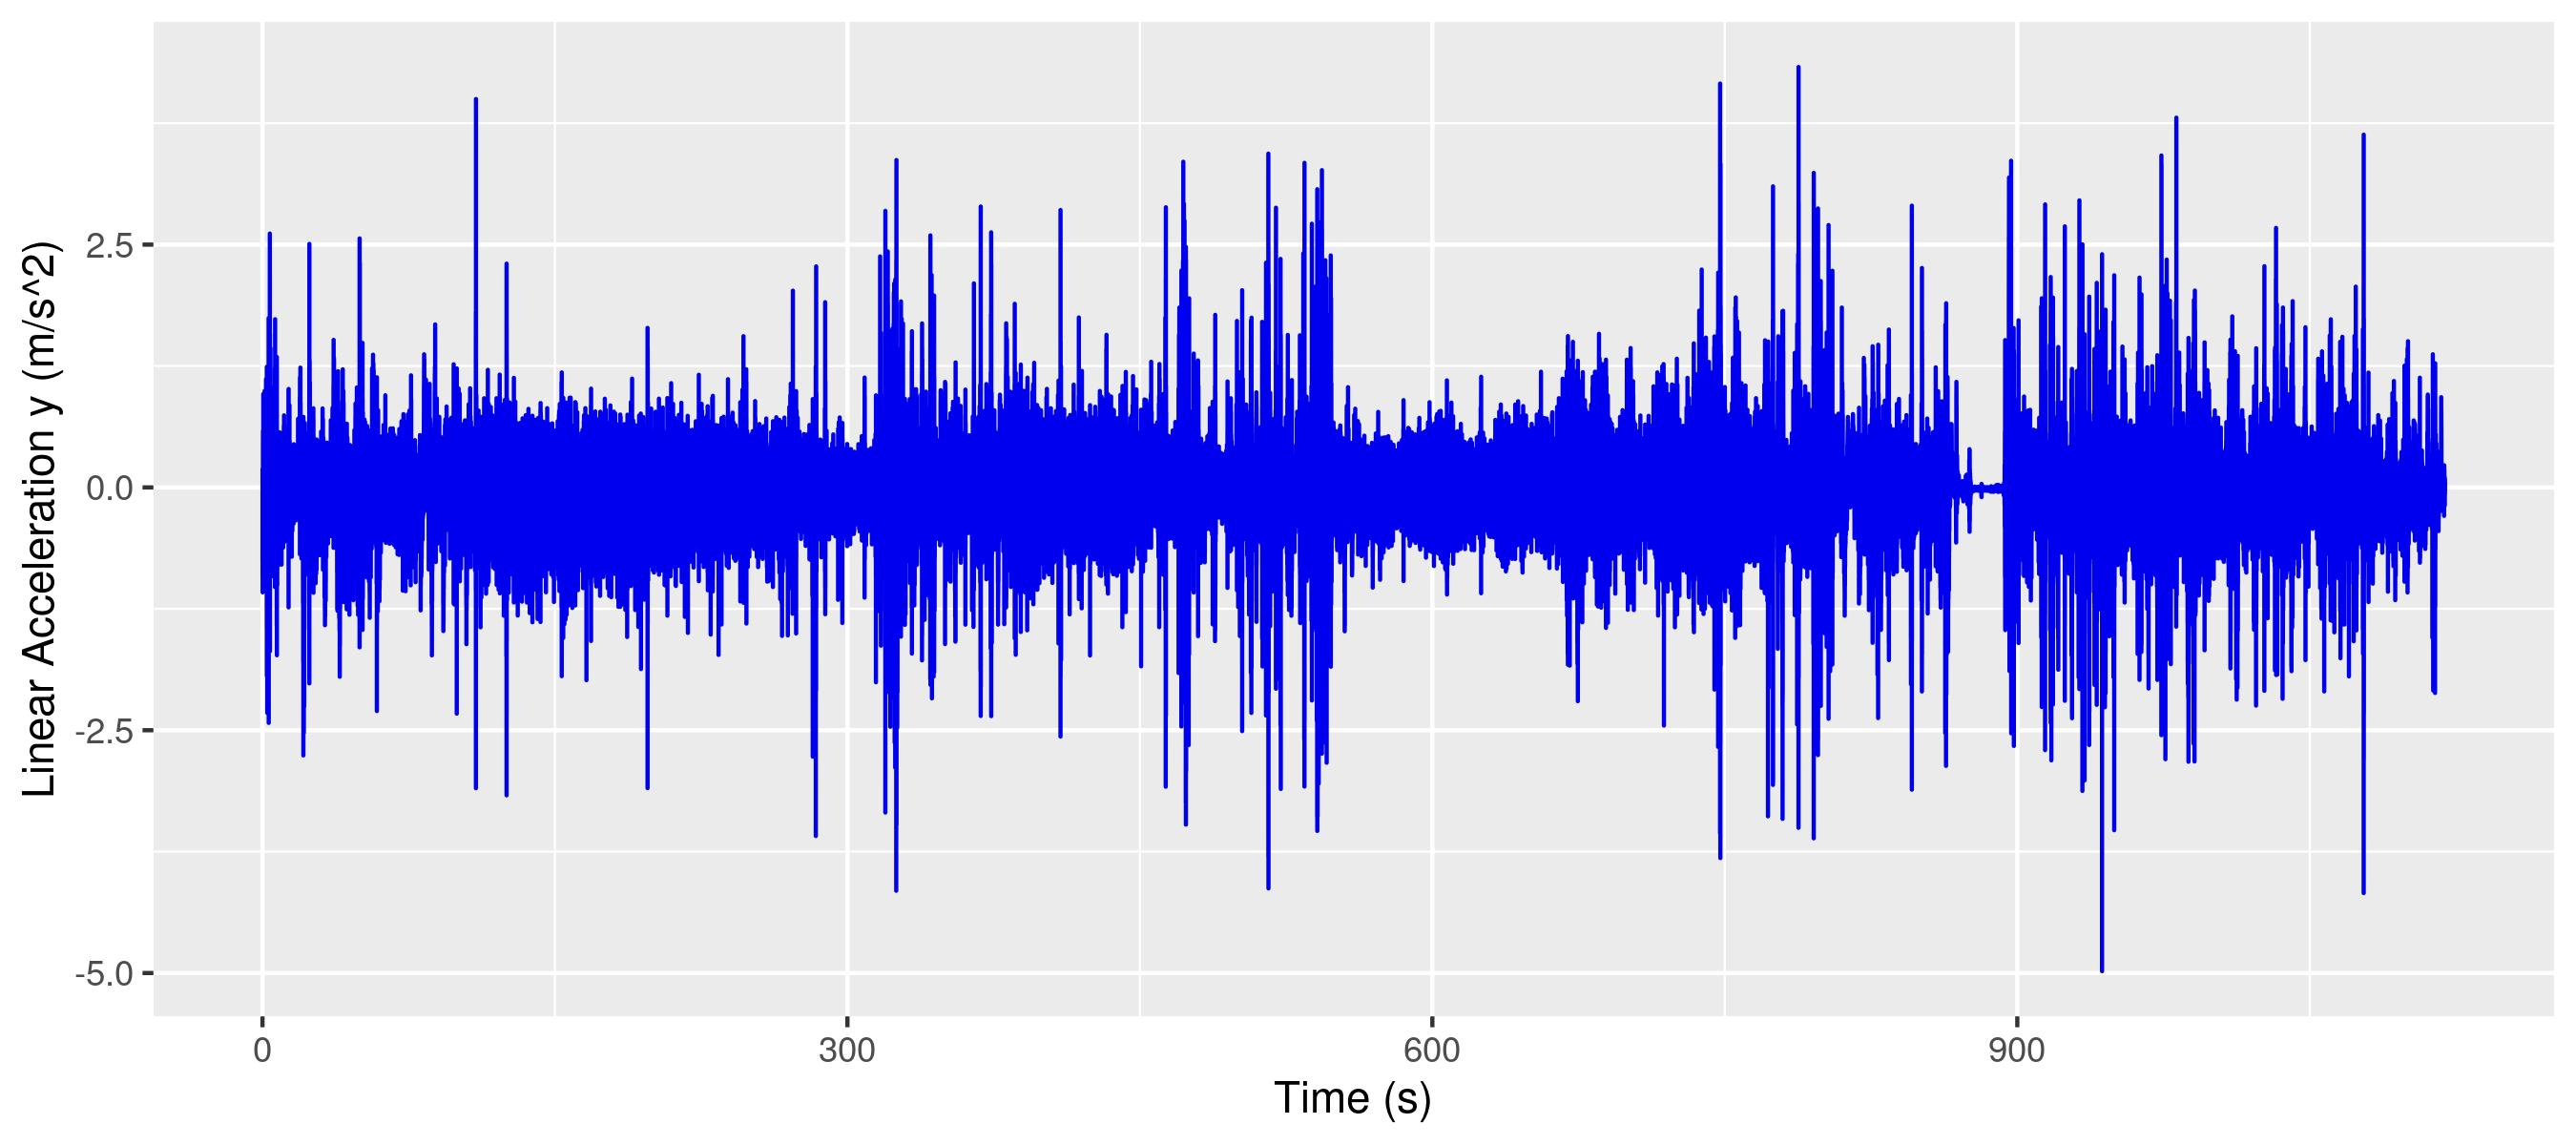

In [4]:
//Plot raw y-axis data
rawData.plot(Aes(x = "Time (s)")).geomLine(color = RColor.blue2, mapping = Aes(y="Linear Acceleration y (m/s^2)"))

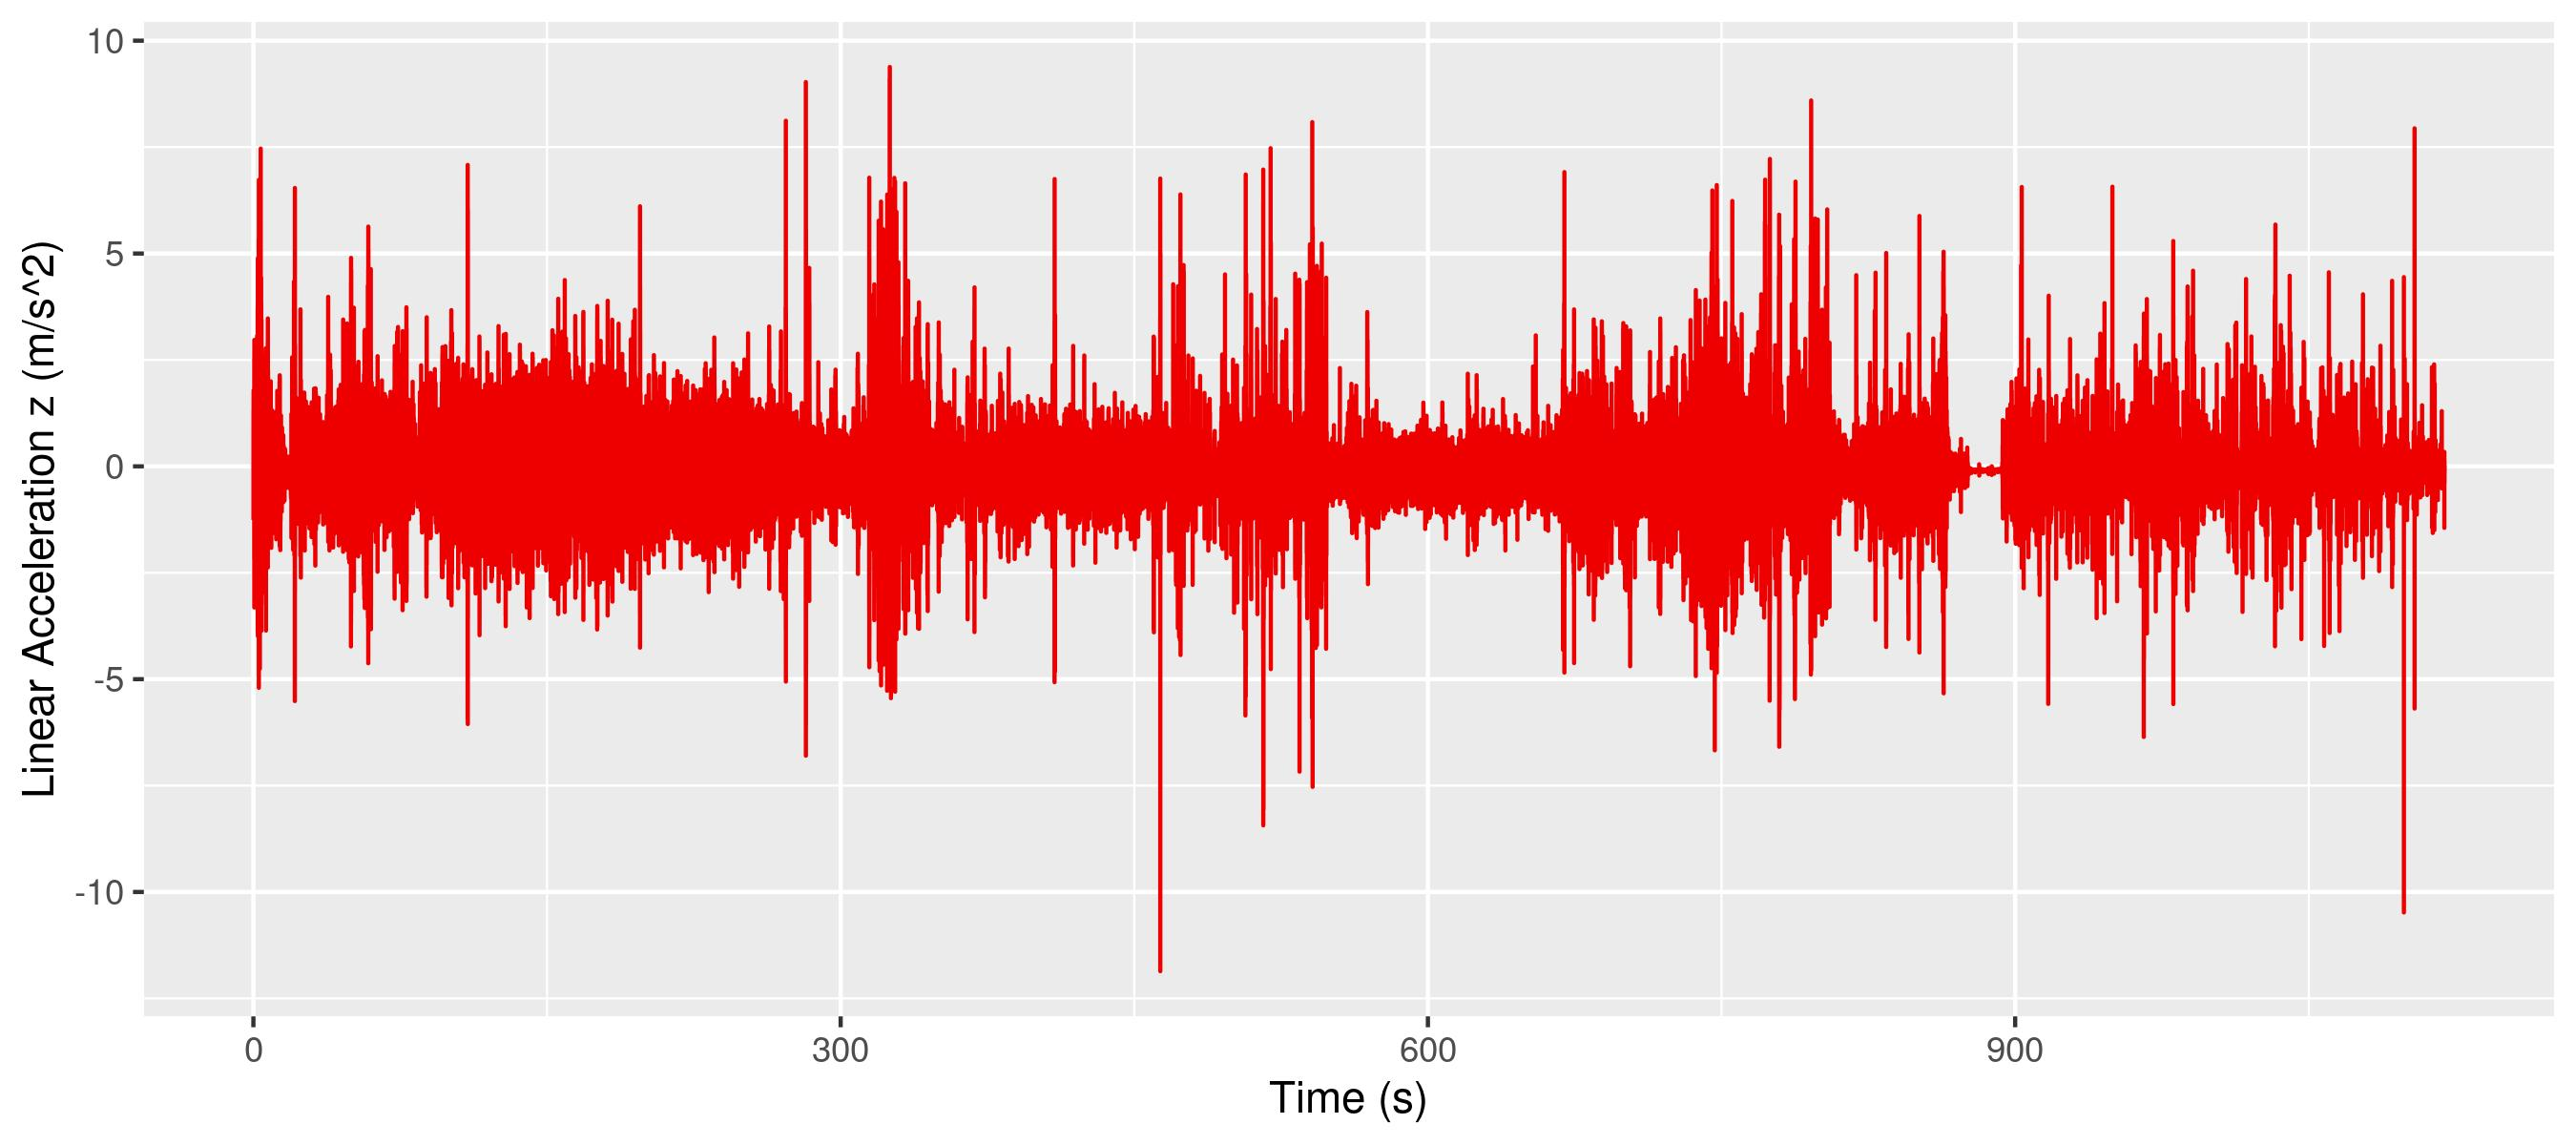

In [5]:
//Plot raw z-axis data
//In this experiment, the z-axis data is quite useless
rawData.plot(Aes(x = "Time (s)")).geomLine(color = RColor.red2, mapping = Aes(y="Linear Acceleration z (m/s^2)"))

In [6]:
//A simple test pattern to find in the data: 2 to ∞ adjacent data-points with a rise of 1.0 to ∞ g's each
val testPattern = ValuePattern(ValuePatternPart(ValueRelationType.ASCENDING, 2, Int.MAX_VALUE, 0.5, Double.MAX_VALUE))

In [12]:
import org.apache.commons.lang3.StringUtils
import org.apache.commons.lang3.builder.ReflectionToStringBuilder
fun applyPattern(pattern: ValuePattern, frame: DataFrame, colName: String): DataFrame {
    //Map chunks of size 2 to ValueRelations
    val valueRelations = frame.rows.chunked(2)
    //An uneven amount of data-points causes one half-empty chunk, filtering it out
    .filter{chunk -> chunk.size == 2}
    .map { valueChunk -> ValueRelation(valueChunk[0][colName] as Double, 
                                       valueChunk[1][colName] as Double,
                                       valueChunk[0]["Time (s)"] as Double, 
                                       valueChunk[1]["Time (s)"] as Double)}
    .toMutableList()
    val results = emptyList<List<ValueRelation>>().toMutableList()
    for(start in 0 until valueRelations.size - pattern.patternParts.sumOf{part -> part.nmin} - 1) {
        var i = (start + pattern.patternParts.sumOf{part -> part.nmin}).coerceAtMost(valueRelations.size -1)
        if(!pattern.matches(valueRelations.slice(start until i))) continue
        while(pattern.matches(valueRelations.slice(start until i)) && i != valueRelations.size - 1) {
            i++
        }
        results.add(valueRelations.slice(start until i))
        valueRelations.removeAll(valueRelations.slice(start until i))
    }
    //println(results.size)
    //results.forEach{result -> println(StringUtils.repeat("=", 50)); result.forEach{value -> println(ReflectionToStringBuilder.toString(value)); println(StringUtils.repeat("=", 50))}}
    //val filteredRelations = valueRelations.slice(applyPattern(
    //val mappedTimes = filteredRelations.flatten().map{relation -> relation.firstValueTime!!}
    //return rawData.filterByRow { mappedTimes.contains(it["Time (s)"] as Double) }
    return frame
}
//applyPattern(ValuePattern(ValuePatternPart(ValueRelationType.ASCENDING, 1, Int.MAX_VALUE, 0.1, Double.MAX_VALUE), ValuePatternPart(ValueRelationType.DESCENDING, 1, Int.MAX_VALUE, 0.1, Double.MAX_VALUE)), rawData, "Linear Acceleration y (m/s^2)")

141543


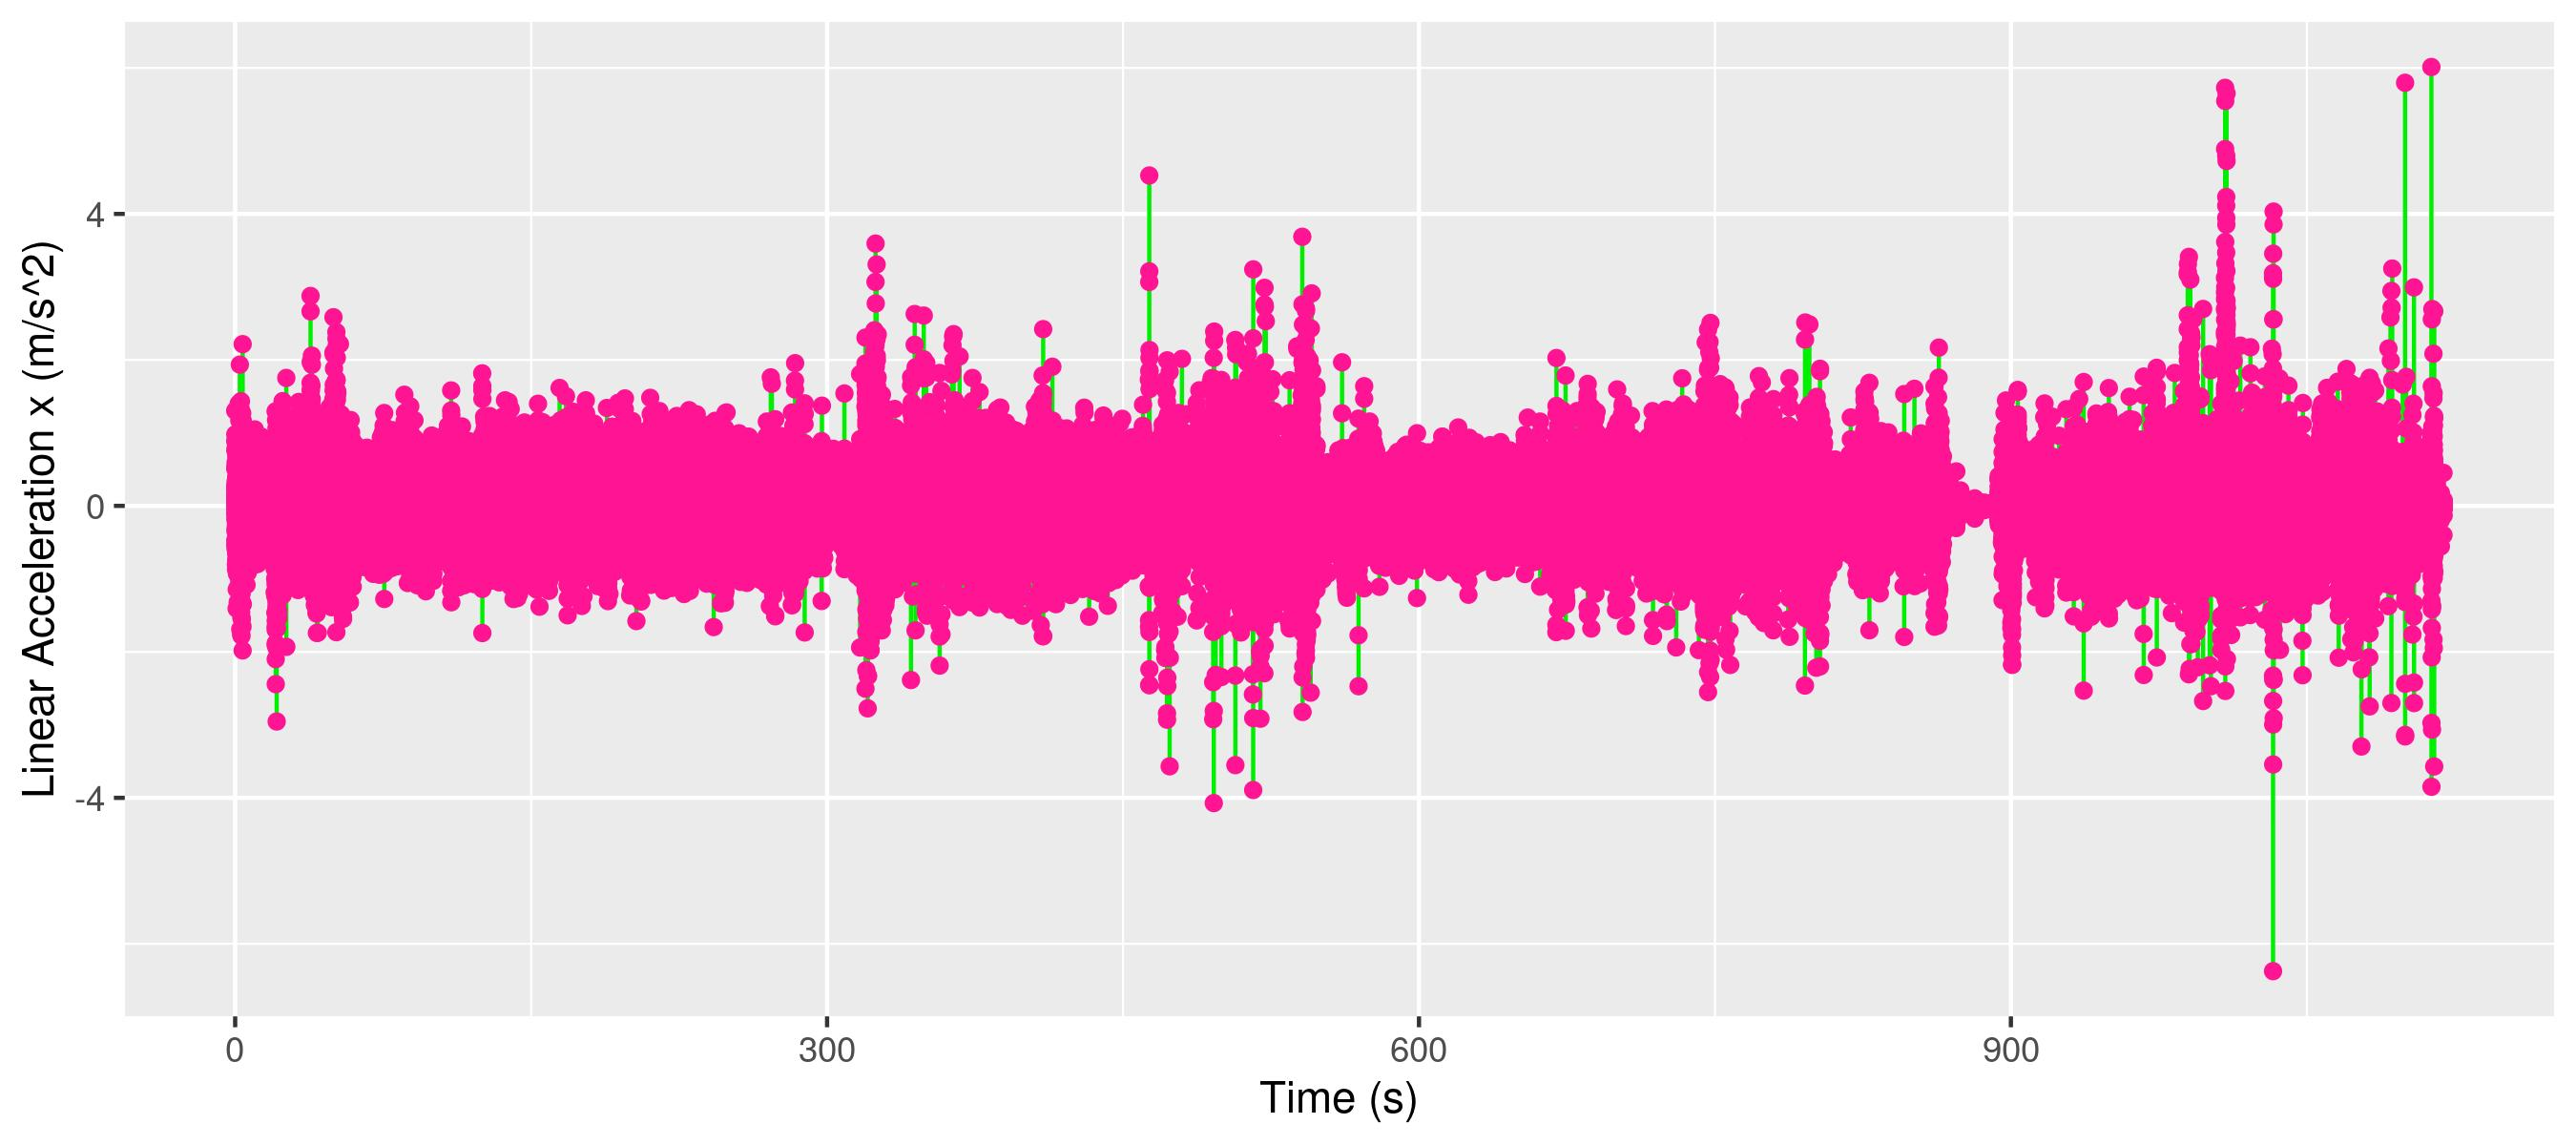

In [18]:
//Plot the raw data as well as the filtered data
val xPattern = ValuePattern(ValuePatternPart(ValueRelationType.DESCENDING, 3, Int.MAX_VALUE, 1.0, Double.MAX_VALUE), ValuePatternPart(ValueRelationType.ASCENDING, 3, Int.MAX_VALUE, 0.5, Double.MAX_VALUE))
val filteredXData = applyPattern(xPattern, rawData, "Linear Acceleration x (m/s^2)")
println(filteredXData.nrow)
rawData.plot(Aes(x = "Time (s)"))
    .geomLine(color = RColor.green2, mapping = Aes(y="Linear Acceleration x (m/s^2)"))
    .geomPoint(color = RColor.deeppink, mapping = Aes(y="Linear Acceleration x (m/s^2)"), `data` = filteredXData)

[ValueRelation(firstValue=-0.754181385, secondValue=0.1890258789, firstValueTime=0.020491067, secondValueTime=0.028425637, relationType=ASCENDING, differenceReal=-0.9432072639, differenceAbs=0.9432072639), ValueRelation(firstValue=-0.6103625298, secondValue=-0.9297914505, firstValueTime=0.03632969, secondValueTime=0.044233742, relationType=DESCENDING, differenceReal=0.31942892069999995, differenceAbs=0.31942892069999995)]
false
[ValueRelation(firstValue=-0.6103625298, secondValue=-0.9297914505, firstValueTime=0.03632969, secondValueTime=0.044233742, relationType=DESCENDING, differenceReal=0.31942892069999995, differenceAbs=0.31942892069999995), ValueRelation(firstValue=-0.0661945343, secondValue=-0.2584381104, firstValueTime=0.052168313, secondValueTime=0.060041848, relationType=DESCENDING, differenceReal=0.19224357609999998, differenceAbs=0.19224357609999998)]
false
[ValueRelation(firstValue=-0.0661945343, secondValue=-0.2584381104, firstValueTime=0.052168313, secondValueTime=0.060041

false
[ValueRelation(firstValue=0.04136562347, secondValue=-0.4045820236, firstValueTime=0.336988869, secondValueTime=0.344862404, relationType=DESCENDING, differenceReal=0.44594764707, differenceAbs=0.44594764707), ValueRelation(firstValue=-0.2682218552, secondValue=-0.4998636246, firstValueTime=0.35273594, secondValueTime=0.360578957, relationType=DESCENDING, differenceReal=0.23164176939999997, differenceAbs=0.23164176939999997)]
false
[ValueRelation(firstValue=-0.2682218552, secondValue=-0.4998636246, firstValueTime=0.35273594, secondValueTime=0.360578957, relationType=DESCENDING, differenceReal=0.23164176939999997, differenceAbs=0.23164176939999997), ValueRelation(firstValue=0.1148915291, secondValue=-0.01860189438, firstValueTime=0.368513527, secondValueTime=0.37641758, relationType=DESCENDING, differenceReal=0.13349342348, differenceAbs=0.13349342348)]
false
[ValueRelation(firstValue=0.1148915291, secondValue=-0.01860189438, firstValueTime=0.368513527, secondValueTime=0.37641758,

false
[ValueRelation(firstValue=0.381688118, secondValue=-0.2889256477, firstValueTime=0.653395119, secondValueTime=0.66132969, relationType=DESCENDING, differenceReal=0.6706137657, differenceAbs=0.6706137657), ValueRelation(firstValue=-0.8996083736, secondValue=-0.9313361645, firstValueTime=0.669203225, secondValueTime=0.677046242, relationType=DESCENDING, differenceReal=0.0317277909, differenceAbs=0.0317277909)]
false
[ValueRelation(firstValue=-0.8996083736, secondValue=-0.9313361645, firstValueTime=0.669203225, secondValueTime=0.677046242, relationType=DESCENDING, differenceReal=0.0317277909, differenceAbs=0.0317277909), ValueRelation(firstValue=0.3717265129, secondValue=0.609562397, firstValueTime=0.684980813, secondValueTime=0.692884865, relationType=ASCENDING, differenceReal=-0.23783588410000006, differenceAbs=0.23783588410000006)]
false
[ValueRelation(firstValue=0.3717265129, secondValue=0.609562397, firstValueTime=0.684980813, secondValueTime=0.692884865, relationType=ASCENDING

false
[ValueRelation(firstValue=0.4317960739, secondValue=-0.8493964672, firstValueTime=0.969831887, secondValueTime=0.977766457, relationType=DESCENDING, differenceReal=1.2811925411, differenceAbs=1.2811925411), ValueRelation(firstValue=0.3761363029, secondValue=0.4140219688, firstValueTime=0.98567051, secondValueTime=0.993544045, relationType=ASCENDING, differenceReal=-0.037885665899999976, differenceAbs=0.037885665899999976)]
false
[ValueRelation(firstValue=0.3761363029, secondValue=0.4140219688, firstValueTime=0.98567051, secondValueTime=0.993544045, relationType=ASCENDING, differenceReal=-0.037885665899999976, differenceAbs=0.037885665899999976), ValueRelation(firstValue=-0.2270298004, secondValue=-0.0539855957, firstValueTime=1.001448098, secondValueTime=1.009352151, relationType=ASCENDING, differenceReal=-0.1730442047, differenceAbs=0.1730442047)]
false
[ValueRelation(firstValue=-0.2270298004, secondValue=-0.0539855957, firstValueTime=1.001448098, secondValueTime=1.009352151, re

false
[ValueRelation(firstValue=0.1953477859, secondValue=-0.4813137054, firstValueTime=1.333540383, secondValueTime=1.341444436, relationType=DESCENDING, differenceReal=0.6766614913, differenceAbs=0.6766614913), ValueRelation(firstValue=-0.5906910896, secondValue=0.3399505615, firstValueTime=1.349348488, secondValueTime=1.357283059, relationType=ASCENDING, differenceReal=-0.9306416511000001, differenceAbs=0.9306416511000001)]
false
[ValueRelation(firstValue=-0.5906910896, secondValue=0.3399505615, firstValueTime=1.349348488, secondValueTime=1.357283059, relationType=ASCENDING, differenceReal=-0.9306416511000001, differenceAbs=0.9306416511000001), ValueRelation(firstValue=0.4113779068, secondValue=0.7812809944, firstValueTime=1.365187111, secondValueTime=1.373152199, relationType=ASCENDING, differenceReal=-0.36990308759999996, differenceAbs=0.36990308759999996)]
false
[ValueRelation(firstValue=0.4113779068, secondValue=0.7812809944, firstValueTime=1.365187111, secondValueTime=1.3731521

false
[ValueRelation(firstValue=0.4479994774, secondValue=-0.642364502, firstValueTime=1.633924904, secondValueTime=1.641828957, relationType=DESCENDING, differenceReal=1.0903639794, differenceAbs=1.0903639794), ValueRelation(firstValue=-0.8104221821, secondValue=-0.1055355072, firstValueTime=1.649794045, secondValueTime=1.65766758, relationType=ASCENDING, differenceReal=-0.7048866749, differenceAbs=0.7048866749)]
false
[ValueRelation(firstValue=-0.8104221821, secondValue=-0.1055355072, firstValueTime=1.649794045, secondValueTime=1.65766758, relationType=ASCENDING, differenceReal=-0.7048866749, differenceAbs=0.7048866749), ValueRelation(firstValue=0.1873121262, secondValue=0.408162117, firstValueTime=1.665541115, secondValueTime=1.673506203, relationType=ASCENDING, differenceReal=-0.22084999079999998, differenceAbs=0.22084999079999998)]
false
[ValueRelation(firstValue=0.1873121262, secondValue=0.408162117, firstValueTime=1.665541115, secondValueTime=1.673506203, relationType=ASCENDING,

false
[ValueRelation(firstValue=0.9997434616, secondValue=-0.4689593315, firstValueTime=1.934400979, secondValueTime=1.942335549, relationType=DESCENDING, differenceReal=1.4687027931, differenceAbs=1.4687027931), ValueRelation(firstValue=-0.6807341576, secondValue=0.2673697472, firstValueTime=1.950331154, secondValueTime=1.95820469, relationType=ASCENDING, differenceReal=-0.9481039048, differenceAbs=0.9481039048)]
false
[ValueRelation(firstValue=-0.6807341576, secondValue=0.2673697472, firstValueTime=1.950331154, secondValueTime=1.95820469, relationType=ASCENDING, differenceReal=-0.9481039048, differenceAbs=0.9481039048), ValueRelation(firstValue=0.2547497749, secondValue=0.2756891251, firstValueTime=1.96613926, secondValueTime=1.974012795, relationType=ASCENDING, differenceReal=-0.020939350199999984, differenceAbs=0.020939350199999984)]
false
[ValueRelation(firstValue=0.2547497749, secondValue=0.2756891251, firstValueTime=1.96613926, secondValueTime=1.974012795, relationType=ASCENDING

false
[ValueRelation(firstValue=-1.938213587, secondValue=-0.9405500889, firstValueTime=2.235029641, secondValueTime=2.242994729, relationType=ASCENDING, differenceReal=-0.9976634980999999, differenceAbs=0.9976634980999999), ValueRelation(firstValue=-0.2298073769, secondValue=0.02236413956, firstValueTime=2.250898781, secondValueTime=2.258772317, relationType=ASCENDING, differenceReal=-0.25217151646, differenceAbs=0.25217151646)]
false
[ValueRelation(firstValue=-0.2298073769, secondValue=0.02236413956, firstValueTime=2.250898781, secondValueTime=2.258772317, relationType=ASCENDING, differenceReal=-0.25217151646, differenceAbs=0.25217151646), ValueRelation(firstValue=-0.03994321823, secondValue=-0.5634045601, firstValueTime=2.266706887, secondValueTime=2.274580422, relationType=DESCENDING, differenceReal=0.5234613418699999, differenceAbs=0.5234613418699999)]
false
[ValueRelation(firstValue=-0.03994321823, secondValue=-0.5634045601, firstValueTime=2.266706887, secondValueTime=2.274580422

false
[ValueRelation(firstValue=-0.5367364883, secondValue=-1.333104372, firstValueTime=2.551435891, secondValueTime=2.559370461, relationType=DESCENDING, differenceReal=0.7963678837, differenceAbs=0.7963678837), ValueRelation(firstValue=-0.962972641, secondValue=-0.7158176899, firstValueTime=2.567274514, secondValueTime=2.575148049, relationType=ASCENDING, differenceReal=-0.24715495109999996, differenceAbs=0.24715495109999996)]
false
[ValueRelation(firstValue=-0.962972641, secondValue=-0.7158176899, firstValueTime=2.567274514, secondValueTime=2.575148049, relationType=ASCENDING, differenceReal=-0.24715495109999996, differenceAbs=0.24715495109999996), ValueRelation(firstValue=-1.509022236, secondValue=-1.155178785, firstValueTime=2.583082619, secondValueTime=2.590956154, relationType=ASCENDING, differenceReal=-0.35384345100000014, differenceAbs=0.35384345100000014)]
false
[ValueRelation(firstValue=-1.509022236, secondValue=-1.155178785, firstValueTime=2.583082619, secondValueTime=2.590

true
[ValueRelation(firstValue=-0.7402181625, secondValue=-0.4669938087, firstValueTime=2.962446633, secondValueTime=2.970350686, relationType=ASCENDING, differenceReal=-0.27322435380000004, differenceAbs=0.27322435380000004), ValueRelation(firstValue=-0.08340835571, secondValue=-0.2291333675, firstValueTime=2.978346291, secondValueTime=2.986219826, relationType=DESCENDING, differenceReal=0.14572501178999997, differenceAbs=0.14572501178999997)]
false
[ValueRelation(firstValue=-0.08340835571, secondValue=-0.2291333675, firstValueTime=2.978346291, secondValueTime=2.986219826, relationType=DESCENDING, differenceReal=0.14572501178999997, differenceAbs=0.14572501178999997), ValueRelation(firstValue=-0.2695803642, secondValue=-0.3841714859, firstValueTime=2.994154397, secondValueTime=3.002058449, relationType=DESCENDING, differenceReal=0.11459112170000002, differenceAbs=0.11459112170000002)]
false
[ValueRelation(firstValue=-0.2695803642, secondValue=-0.3841714859, firstValueTime=2.994154397,

false
[ValueRelation(firstValue=-0.5391480923, secondValue=-0.210514307, firstValueTime=3.310347024, secondValueTime=3.318220559, relationType=ASCENDING, differenceReal=-0.32863378530000004, differenceAbs=0.32863378530000004), ValueRelation(firstValue=-0.4968693256, secondValue=-1.232504368, firstValueTime=3.326124611, secondValueTime=3.334059182, relationType=DESCENDING, differenceReal=0.7356350424, differenceAbs=0.7356350424)]
false
[ValueRelation(firstValue=-0.4968693256, secondValue=-1.232504368, firstValueTime=3.326124611, secondValueTime=3.334059182, relationType=DESCENDING, differenceReal=0.7356350424, differenceAbs=0.7356350424), ValueRelation(firstValue=0.7298262119, secondValue=0.929643631, firstValueTime=3.341963235, secondValueTime=3.349897805, relationType=ASCENDING, differenceReal=-0.19981741910000006, differenceAbs=0.19981741910000006)]
false
[ValueRelation(firstValue=0.7298262119, secondValue=0.929643631, firstValueTime=3.341963235, secondValueTime=3.349897805, relation

false
[ValueRelation(firstValue=0.2613286972, secondValue=0.177136898, firstValueTime=3.674238625, secondValueTime=3.682142678, relationType=DESCENDING, differenceReal=0.08419179920000003, differenceAbs=0.08419179920000003), ValueRelation(firstValue=0.2065289021, secondValue=-0.3006234169, firstValueTime=3.690107766, secondValueTime=3.698011818, relationType=DESCENDING, differenceReal=0.507152319, differenceAbs=0.507152319)]
false
[ValueRelation(firstValue=0.2065289021, secondValue=-0.3006234169, firstValueTime=3.690107766, secondValueTime=3.698011818, relationType=DESCENDING, differenceReal=0.507152319, differenceAbs=0.507152319), ValueRelation(firstValue=-0.6724321842, secondValue=0.01013016701, firstValueTime=3.705854836, secondValueTime=3.713728371, relationType=ASCENDING, differenceReal=-0.68256235121, differenceAbs=0.68256235121)]
false
[ValueRelation(firstValue=-0.6724321842, secondValue=0.01013016701, firstValueTime=3.705854836, secondValueTime=3.713728371, relationType=ASCENDI

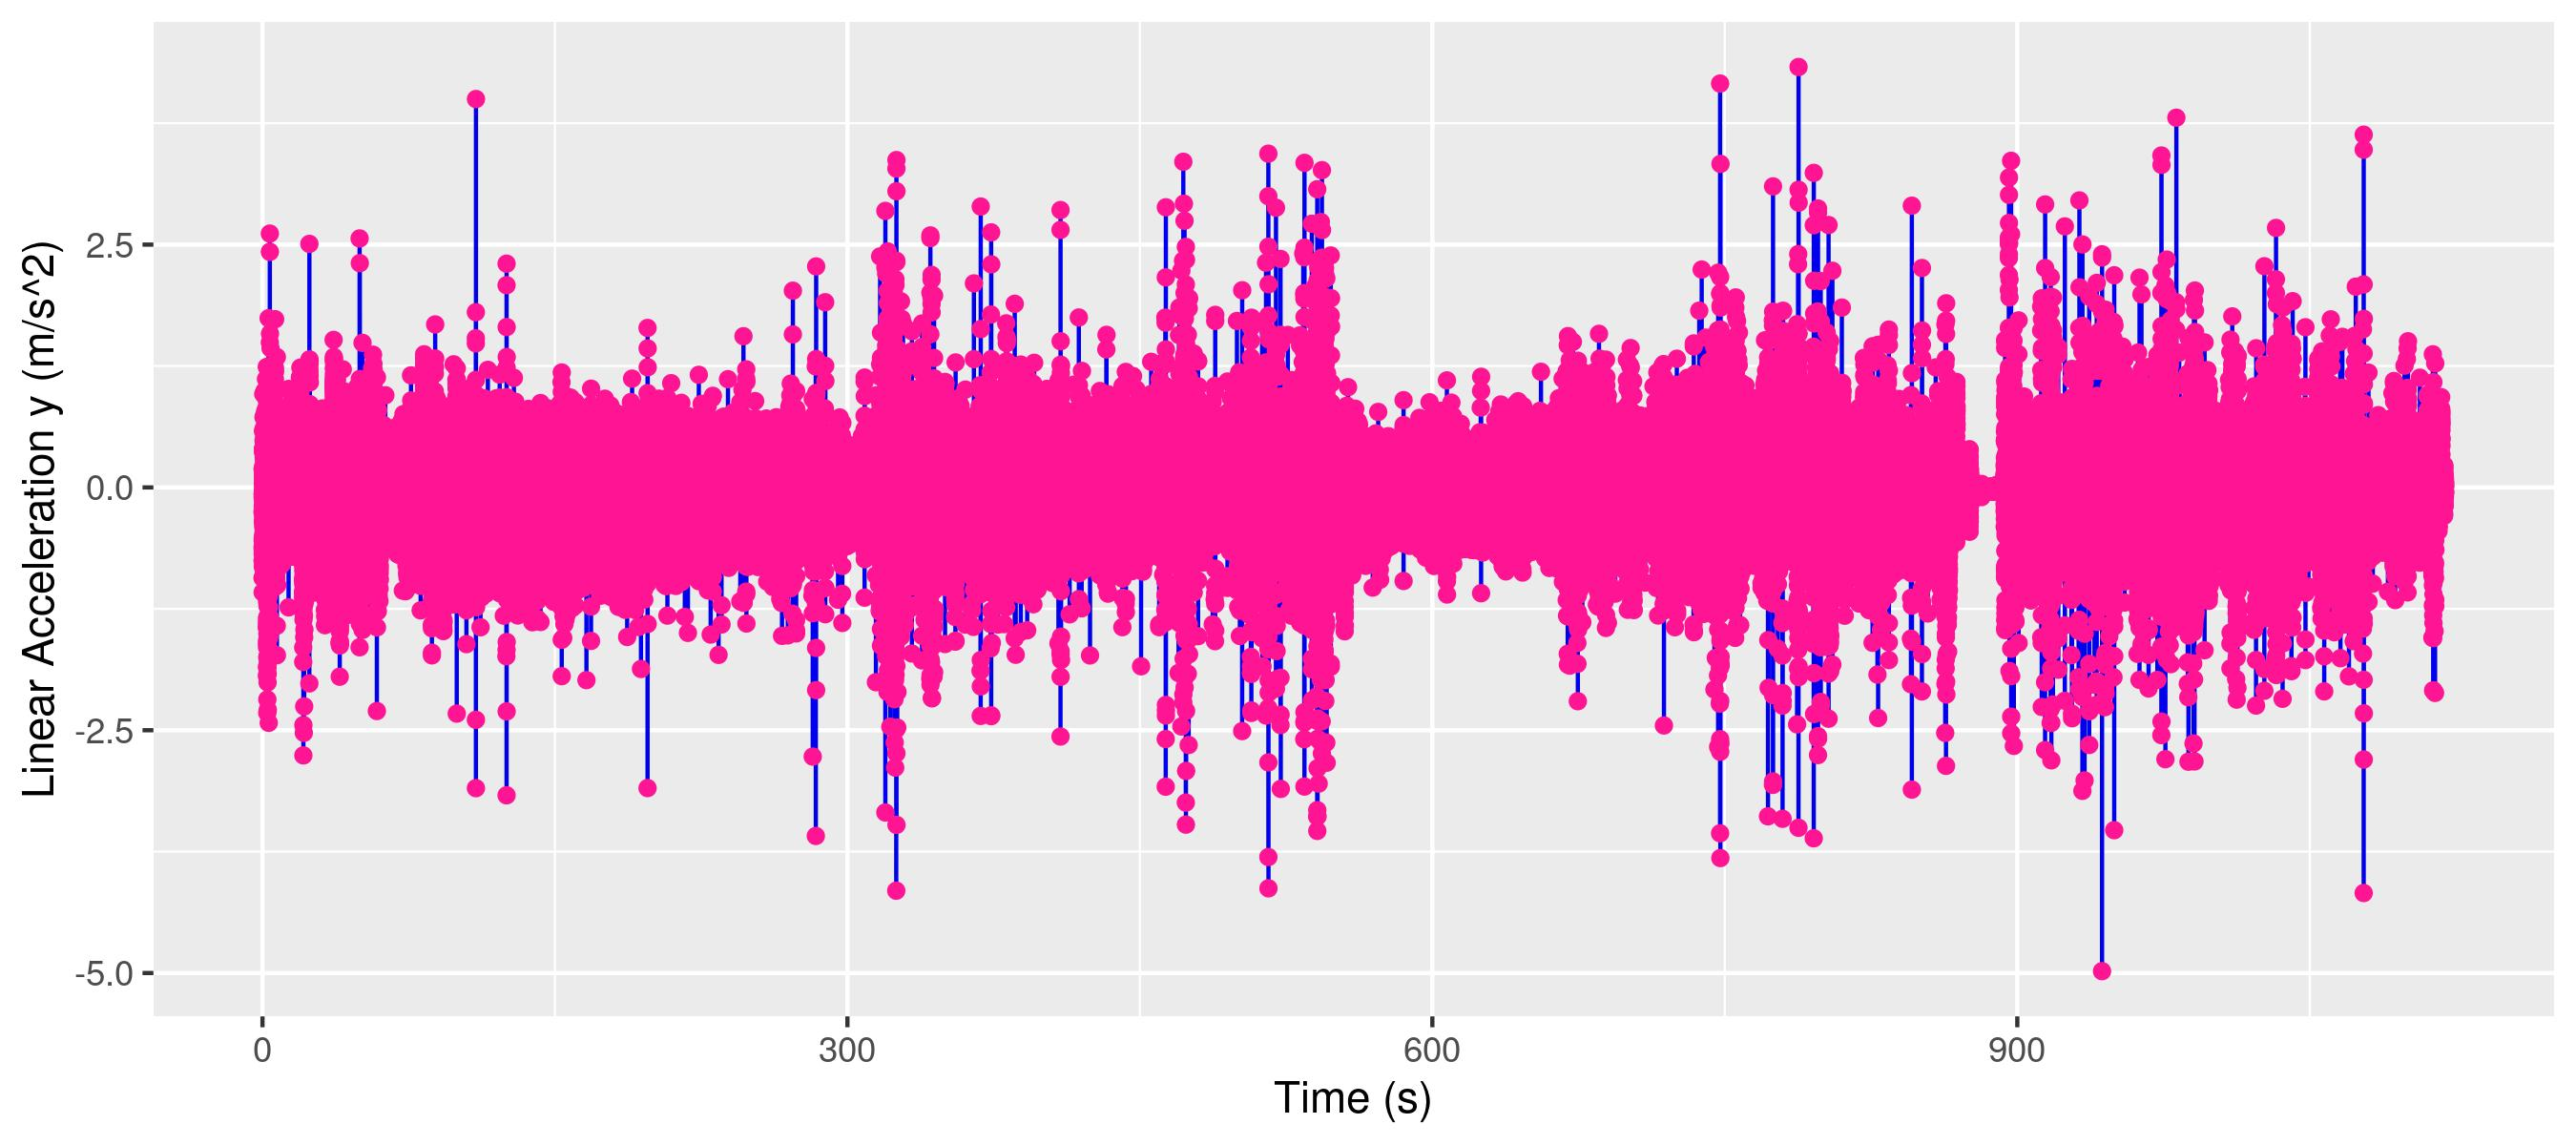

In [9]:
//Plot the raw data as well as the filtered data
val filteredYData = applyPattern(testPattern, rawData, "Linear Acceleration y (m/s^2)")
rawData.plot(Aes(x = "Time (s)"))
    .geomLine(color = RColor.blue2, mapping = Aes(y="Linear Acceleration y (m/s^2)"))
    .geomPoint(color = RColor.deeppink, mapping = Aes(y="Linear Acceleration y (m/s^2)"), `data` = filteredYData)